<a href="https://colab.research.google.com/github/trista-paul/DS-Unit-4-Sprint-3-Neural-Networks/blob/master/DS_Unit_4_Sprint_3_Neural_Nets_Spring_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks Sprint Challenge

## 1) Define the following terms:

- Neuron - neurons are the units that make up neural network layers. Each has their own weight in hiden layers. They are like real life neurons inasfar as they have thresholds for 'activation' (moving relevant predictors forward while pruning the less useful).

- Input Layer - the first layer of a neural network, activating the initial input. It is the only layer to take the parameters input_dim or input_shape (which are  set to be equal to the number of features), and the only one an engineer directly interacts with.

- Hidden Layer - layers that multiply input by weight, add bias, and lastly apply activation functions. There can be arbitrarily many hidden layers with arbitrarily many neurons.

- Output Layer - final layer of neural network, which applies an activation function to get the prediction in a comparable scale to the true output. The neuron number is equal to the number of output variables being predicted for (usually just 1).

- Activation - function that moves useful neurons to the next layer while pruning others.

- Backpropagation - short for backwards propogation of errors, a second weight update (after feed forward) going in reverse layer order. Backprop typically involves taking the difference from prediction and true output and calculating a gradient descent from it.

 YOUR ANSWER HERE

## 2) Create a perceptron class that can model the behavior of an AND gate. You can use the following table as your training data:

| x1 | x2 | x3 | y |
|----|----|----|---|
| 1  | 1  | 1  | 1 |
| 1  | 0  | 1  | 0 |
| 0  | 1  | 1  | 0 |
| 0  | 0  | 1  | 0 |

In [0]:
import numpy as np

X = np.array([[1, 1, 1],
              [1, 0, 1],
              [0, 1, 1],
              [0, 0, 1]])

y = [[1],
     [0],
     [0],
     [0]]

In [0]:
class FPerceptron(object):
  
  #parameters: learning rate and number of epochs
    def __init__(self, rate = 0.1, epochs = 100):
        self.rate = rate
        self.epochs = epochs
    
   #dot product of inputs with weights, plus bias
    def weighted_sum(self, X):
        return np.dot(X, self.weight[1:]) + self.weight[0]
  
  #make classification, constrained from 0 to 1
    def predict(self, X):
        pred = np.where(self.weighted_sum(X) >= 0.0, 1, 0)
        self.predictions.append(pred)
        return pred
        
  
    def fit(self, X, y):
        #make an array of x0 weights, including one extra to represent bias 
        self.weight = np.zeros(1 + X.shape[1]) 
  
        #make an empty list for differences in output to prediction
        self.errors = []

        #for each epoch...
        for i in range(self.epochs):
            #make error var
            error = 0
            
            #make an empty list for this epoch's predictions
            self.predictions = []
            
            #for each input and true output...
            for xi, target in zip(X, y):
                #predict for the input, subtract true from prediction
                #multiply by learn rate
                w_adjustments = self.rate * (target - self.predict(xi))
        
                #modify input weights - add adjustments times input
                self.weight[1:] += w_adjustments * xi
        
                #modify bias - add adjustment
                self.weight[0] += w_adjustments
        
                #update error
                error += int(w_adjustments != 0.0)
            #for each epoch, document final error
            self.errors.append(error)
        return self

In [0]:
FP = FPerceptron(0.5, 100)
FP.fit(X, y)

FP.predictions

[array(1), array(0), array(0), array(0)]

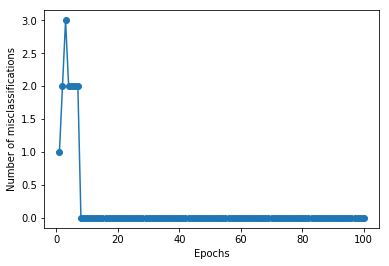

In [0]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(FP.errors) + 1), FP.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## 3) Implement a Neural Network Multilayer Perceptron class that uses backpropagation to update the network's weights. 
- Your network must have one hidden layer. 
- You do not have to update weights via gradient descent. You can use something like the derivative of the sigmoid function to update weights.
- Train your model on the Heart Disease dataset from UCI:

[Github Dataset](https://github.com/ryanleeallred/datasets/blob/master/heart.csv)

[Raw File on Github](https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv)


In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.shape[1]

14

In [0]:
X = df.drop(columns = 'target').values
y = df['target'].values

In [4]:
X.shape

(303, 13)

In [5]:
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [6]:
y.shape

(303,)

In [0]:
new_list = [y[i:i+1].tolist() for i in range(0, len(y), 1)]
y = list(new_list)

In [0]:
import numpy as np

In [0]:
class MLPerceptron(object):
  def __init__(self, epochs=1000, hiddenNodes=3, outputNodes=1):
    #architecture
    self.epochs = epochs
    self.inputs = X.shape[1]
    self.hiddenNodes = hiddenNodes
    self.outputNodes = outputNodes
    
    #weights for each layer
    self.hidden_weights = np.random.randn(self.inputs, self.hiddenNodes) #2x3
    self.output_weights = np.random.randn(self.hiddenNodes, self.outputNodes) #3x1
    self.bias1 = 0
    self.bias2 = 0
  
  #activation functions
  def sigmoid(self, s):
    return 1/(1+np.exp(-s))
  
  def sigmoidPrime(self, s):
    return s * (1 - s)
  
  #forward prop
  def feed_forward(self, X):
    #weighted sum of inputs and hidden layer
    self.hidden_sum = np.dot(X, self.hidden_weights) + self.bias1
    #activate weighted sum
    self.activated_hidden = self.sigmoid(self.hidden_sum)
    #weighted sum between hidden and output
    self.output_sum = np.dot(self.activated_hidden, self.output_weights) + self.bias2
    #final activation
    self.activated_output = self.sigmoid(self.output_sum)
    return self.activated_output
  
  #backward prop
  def backward(self, X, y, o):
    #calculate distance from true output to prediction
    self.output_error = y - o
    #multiply by sigmoid derivative of prediction
    self.output_adjustments = self.output_error*self.sigmoidPrime(o)
    #calculate distance from true output to prediction
    self.weight_error = y - o
    #multiply by sigmoid derivative of the hidden layer's weighted sum
    self.weight_adjustments = self.weight_error*self.sigmoidPrime(self.activated_hidden)
    #update weights
    self.hidden_weights += X.T.dot(self.weight_adjustments)
    self.bias1 += self.weight_adjustments
    self.output_weights += self.activated_hidden.T.dot(self.output_adjustments)
    self.bias2 += self.output_adjustments
    return self.hidden_weights, self.output_weights, self.bias1, self.bias2
  
  #predict and update for i epochs
  def train(self, X, y):
    #record loss
    self.loss = []
    #for each epoch...
    for i in range(self.epochs):
        #get activated output
        o = self.feed_forward(X)
        #update weights
        self.backward(X, y, o)
        #calculate loss
        l = np.mean(np.square(y - o))
        self.loss.append(l)
    return self

In [72]:
MLP = MLPerceptron(100, 3, 1)
MLP.train(X, y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


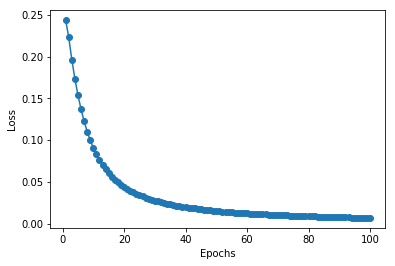

In [73]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(MLP.loss) + 1), MLP.loss, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## 4) Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy. 

- Use the Heart Disease Dataset (binary classification)
- Use an appropriate loss function for a binary classification task
- Use an appropriate activation function on the final layer of your network. 
- Train your model using verbose output for ease of grading.
- Use GridSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
- When hyperparameter tuning, show you work by adding code cells for each new experiment. 
- Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
- You must hyperparameter tune at least 5 parameters in order to get a 3 on this section.

In [74]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [76]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [0]:
X = df.drop(columns = 'target').values
X = keras.utils.normalize(X, axis=-1, order=2)
y = df['target'].values

In [79]:
model = Sequential()

#input layer: input_dim is number of features
model.add(Dense(12, input_dim=X.shape[1], activation='relu'))

#hidden layer 1
model.add(Dense(12, activation='relu'))

#output layer: 1 node and sigmoid
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['mse'])

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                168       
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 13        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [89]:
np.random.seed(0)
history = model.fit(X, y, batch_size=64, epochs=100, verbose=1, validation_split=0.2)

Train on 242 samples, validate on 61 samples
Epoch 1/100
242/242 [==============================] - 0s 65us/step - loss: 0.6116 - mean_squared_error: 0.2131 - val_loss: 1.4727 - val_mean_squared_error: 0.5869
Epoch 2/100
242/242 [==============================] - 0s 39us/step - loss: 0.5978 - mean_squared_error: 0.2076 - val_loss: 1.3457 - val_mean_squared_error: 0.5409
Epoch 3/100
242/242 [==============================] - 0s 37us/step - loss: 0.5785 - mean_squared_error: 0.1994 - val_loss: 1.2227 - val_mean_squared_error: 0.4928
Epoch 4/100
242/242 [==============================] - 0s 31us/step - loss: 0.5700 - mean_squared_error: 0.1947 - val_loss: 1.1142 - val_mean_squared_error: 0.4475
Epoch 5/100
242/242 [==============================] - 0s 43us/step - loss: 0.5667 - mean_squared_error: 0.1923 - val_loss: 1.0426 - val_mean_squared_error: 0.4163
Epoch 6/100
242/242 [==============================] - 0s 33us/step - loss: 0.5657 - mean_squared_error: 0.1912 - val_loss: 1.0060 - va

In [90]:
print(history.history.keys())

dict_keys(['val_loss', 'val_mean_squared_error', 'loss', 'mean_squared_error'])


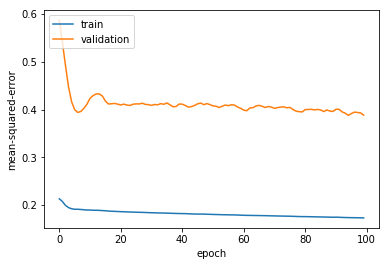

In [91]:
#plot mse over epochs
#train is really good!
#validation is good but can improve
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.xlabel('epoch')
plt.ylabel('mean-squared-error')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [0]:
#gridsearch harness of above model
#change metrics to accuracy
#added additional params to work with
def make_model():
  model = Sequential()
  model.add(Dense(12, input_dim=X.shape[1], activation='relu'))
  model.add(Dense(12, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [0]:
#instantiate new model using harness
model = KerasClassifier(build_fn=make_model, verbose=1)

In [102]:
#list param options for batch size
param_grid = {'batch_size': [8, 24, 32, 64, 128],
              'epochs': [100]}

#instantiate gridsearch
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/100
202/202 [==============================] - 0s 2ms/step - loss: 0.7072 - acc: 0.4158
Epoch 2/100
202/202 [==============================] - 0s 169us/step - loss: 0.6649 - acc: 0.6832
Epoch 3/100
202/202 [==============================] - 0s 171us/step - loss: 0.6452 - acc: 0.6832
Epoch 4/100
202/202 [==============================] - 0s 185us/step - loss: 0.6349 - acc: 0.6832
Epoch 5/100
202/202 [==============================] - 0s 158us/step - loss: 0.6286 - acc: 0.6832
Epoch 6/100
202/202 [==============================] - 0s 176us/step - loss: 0.6265 - acc: 0.6832
Epoch 7/100
202/202 [==============================] - 0s 165us/step - loss: 0.6236 - acc: 0.6832
Epoch 8/100
202/202 [==============================] - 0s 171us/step - loss: 0.6242 - acc: 0.6832
Epoch 9/100
202/202 [==============================] - 0s 167us/step - loss: 0.6224 - acc: 0.6832
Epoch 10/100
202/202 [==============================] - 0s 164us/step - loss: 0.6211 - acc: 0.6832
Epoch 11/100
202/202 

In [103]:
#best batch size
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: 0.3399339935468762 using {'batch_size': 8, 'epochs': 100}


In [104]:
#all batch sizes
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Means: 0.3399339935468762, Stdev: 0.27891206083064474 with: {'batch_size': 8, 'epochs': 100}
Means: 0.2442244278519067, Stdev: 0.304346986855542 with: {'batch_size': 24, 'epochs': 100}
Means: 0.22442244234258193, Stdev: 0.31040652307050576 with: {'batch_size': 32, 'epochs': 100}
Means: 0.21122111994834625, Stdev: 0.29871177249058556 with: {'batch_size': 64, 'epochs': 100}
Means: 0.1881188154220581, Stdev: 0.2660401801074355 with: {'batch_size': 128, 'epochs': 100}


In [0]:
#added additional params to harness after some research
#can grid: input activation, hidden activation, optimizer, learning rate 

from keras.optimizers import Adam

def make_model(activation1 ='relu', activation2 = 'relu'):
  model = Sequential()
  model.add(Dense(12, input_dim=X.shape[1], activation=activation1))
  model.add(Dense(12, activation = activation2))
  model.add(Dense(1, activation='sigmoid'))
  optimizer = Adam(lr=0.001)
  model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

model2 = KerasClassifier(build_fn=make_model, verbose=1)

In [112]:
#list param options for input activation

activations = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = {'activation1' : activations,
              'batch_size' : [8],
              'epochs' : [100]}

grid = GridSearchCV(estimator=model2, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/100
202/202 [==============================] - 2s 8ms/step - loss: 0.7171 - acc: 0.3168
Epoch 2/100
202/202 [==============================] - 0s 233us/step - loss: 0.6933 - acc: 0.4901
Epoch 3/100
202/202 [==============================] - 0s 251us/step - loss: 0.6774 - acc: 0.6832
Epoch 4/100
202/202 [==============================] - 0s 244us/step - loss: 0.6649 - acc: 0.6832
Epoch 5/100
202/202 [==============================] - 0s 244us/step - loss: 0.6544 - acc: 0.6832
Epoch 6/100
202/202 [==============================] - 0s 248us/step - loss: 0.6463 - acc: 0.6832
Epoch 7/100
202/202 [==============================] - 0s 215us/step - loss: 0.6405 - acc: 0.6832
Epoch 8/100
202/202 [==============================] - 0s 265us/step - loss: 0.6366 - acc: 0.6832
Epoch 9/100
202/202 [==============================] - 0s 273us/step - loss: 0.6333 - acc: 0.6832
Epoch 10/100
202/202 [==============================] - 0s 233us/step - loss: 0.6311 - acc: 0.6832
Epoch 11/100
202/202 

In [113]:
#best input activation
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: 0.4488448849310576 using {'activation1': 'softsign', 'batch_size': 8, 'epochs': 100}


In [114]:
#all input activations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Means: 0.2277227726706577, Stdev: 0.3220486335720494 with: {'activation1': 'softmax', 'batch_size': 8, 'epochs': 100}
Means: 0.24422442254060173, Stdev: 0.3110375025370465 with: {'activation1': 'softplus', 'batch_size': 8, 'epochs': 100}
Means: 0.4488448849310576, Stdev: 0.18616904044115207 with: {'activation1': 'softsign', 'batch_size': 8, 'epochs': 100}
Means: 0.3234323436277534, Stdev: 0.2800811821459432 with: {'activation1': 'relu', 'batch_size': 8, 'epochs': 100}
Means: 0.3498349836458861, Stdev: 0.2791462767380539 with: {'activation1': 'tanh', 'batch_size': 8, 'epochs': 100}
Means: 0.22112211260465112, Stdev: 0.31271389058608834 with: {'activation1': 'sigmoid', 'batch_size': 8, 'epochs': 100}
Means: 0.2277227724739427, Stdev: 0.32204863329385236 with: {'activation1': 'hard_sigmoid', 'batch_size': 8, 'epochs': 100}
Means: 0.36303630407297177, Stdev: 0.26299302772676003 with: {'activation1': 'linear', 'batch_size': 8, 'epochs': 100}


In [116]:
#param options for hidden activation

activations = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = {'activation2' : activations,
              'activation1' : ['softsign'],
              'batch_size' : [8],
              'epochs' : [100]}

grid = GridSearchCV(estimator=model2, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/100
202/202 [==============================] - 3s 16ms/step - loss: 0.7194 - acc: 0.3168
Epoch 2/100
202/202 [==============================] - 0s 237us/step - loss: 0.7028 - acc: 0.3168
Epoch 3/100
202/202 [==============================] - 0s 233us/step - loss: 0.6893 - acc: 0.6089
Epoch 4/100
202/202 [==============================] - 0s 256us/step - loss: 0.6749 - acc: 0.6832
Epoch 5/100
202/202 [==============================] - 0s 315us/step - loss: 0.6634 - acc: 0.6832
Epoch 6/100
202/202 [==============================] - 0s 249us/step - loss: 0.6542 - acc: 0.6832
Epoch 7/100
202/202 [==============================] - 0s 235us/step - loss: 0.6464 - acc: 0.6832
Epoch 8/100
202/202 [==============================] - 0s 234us/step - loss: 0.6400 - acc: 0.6832
Epoch 9/100
202/202 [==============================] - 0s 264us/step - loss: 0.6351 - acc: 0.6832
Epoch 10/100
202/202 [==============================] - 0s 242us/step - loss: 0.6318 - acc: 0.6832
Epoch 11/100
202/202

In [117]:
#best hidden activation
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: 0.5049504952462199 using {'activation1': 'softsign', 'activation2': 'softsign', 'batch_size': 8, 'epochs': 100}


In [118]:
#all hidden activations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Means: 0.2838283829366413, Stdev: 0.2848244095125882 with: {'activation1': 'softsign', 'activation2': 'softmax', 'batch_size': 8, 'epochs': 100}
Means: 0.3630363037778993, Stdev: 0.28390512444489435 with: {'activation1': 'softsign', 'activation2': 'softplus', 'batch_size': 8, 'epochs': 100}
Means: 0.5049504952462199, Stdev: 0.16408980732074405 with: {'activation1': 'softsign', 'activation2': 'softsign', 'batch_size': 8, 'epochs': 100}
Means: 0.4488448849310576, Stdev: 0.18999126074344394 with: {'activation1': 'softsign', 'activation2': 'relu', 'batch_size': 8, 'epochs': 100}
Means: 0.4620462047188195, Stdev: 0.1588964109251358 with: {'activation1': 'softsign', 'activation2': 'tanh', 'batch_size': 8, 'epochs': 100}
Means: 0.26402640273862155, Stdev: 0.29969468224307705 with: {'activation1': 'softsign', 'activation2': 'sigmoid', 'batch_size': 8, 'epochs': 100}
Means: 0.27722772287063474, Stdev: 0.2994401644194634 with: {'activation1': 'softsign', 'activation2': 'hard_sigmoid', 'batch_siz

In [0]:
#oops, neither optimizer or lr were legal params how I programmed it.
#I don't think its possible to get both in one. lr seems more relevant.
#this harness also has manipulatible num neurons!

def make_model(activation1 ='relu', activation2 = 'relu',
               learning_rate = 0.01, input_neuron=12, hidden_neuron=12):
  model = Sequential()
  model.add(Dense(input_neuron, input_dim=X.shape[1], activation=activation1))
  model.add(Dense(hidden_neuron, activation = activation2))
  model.add(Dense(1, activation='sigmoid'))
  optimizer = Adam(lr = learning_rate)
  model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])
  return model

model3 = KerasClassifier(build_fn=make_model, verbose=1)

In [123]:
#list of lr
#lowered epochs because it was getting tedious. And late.

rate = [0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = {'learning_rate' : rate,
              'activation2' : ['softsign'],
              'activation1' : ['softsign'],
              'batch_size' : [8],
              'epochs' : [20]}

grid = GridSearchCV(estimator=model3, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/20
202/202 [==============================] - 5s 25ms/step - loss: 0.6508 - acc: 0.6832
Epoch 2/20
202/202 [==============================] - 0s 288us/step - loss: 0.6318 - acc: 0.6832
Epoch 3/20
202/202 [==============================] - 0s 286us/step - loss: 0.6231 - acc: 0.6832
Epoch 4/20
202/202 [==============================] - 0s 286us/step - loss: 0.6183 - acc: 0.6832
Epoch 5/20
202/202 [==============================] - 0s 302us/step - loss: 0.6165 - acc: 0.6832
Epoch 6/20
202/202 [==============================] - 0s 317us/step - loss: 0.6165 - acc: 0.6832
Epoch 7/20
202/202 [==============================] - 0s 325us/step - loss: 0.6163 - acc: 0.6832
Epoch 8/20
202/202 [==============================] - 0s 341us/step - loss: 0.6138 - acc: 0.6832
Epoch 9/20
202/202 [==============================] - 0s 322us/step - loss: 0.6117 - acc: 0.6832
Epoch 10/20
202/202 [==============================] - 0s 317us/step - loss: 0.6130 - acc: 0.6832
Epoch 11/20
202/202 [=========

In [124]:
#best lr - 0.3
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: 0.5445544554455446 using {'activation1': 'softsign', 'activation2': 'softsign', 'batch_size': 8, 'epochs': 20, 'learning_rate': 0.3}


In [125]:
#all lrs
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Means: 0.22442244234258193, Stdev: 0.3173812616617733 with: {'activation1': 'softsign', 'activation2': 'softsign', 'batch_size': 8, 'epochs': 20, 'learning_rate': 0.001}
Means: 0.36963696379472716, Stdev: 0.25848137635768725 with: {'activation1': 'softsign', 'activation2': 'softsign', 'batch_size': 8, 'epochs': 20, 'learning_rate': 0.01}
Means: 0.23762376247459513, Stdev: 0.3360507476336953 with: {'activation1': 'softsign', 'activation2': 'softsign', 'batch_size': 8, 'epochs': 20, 'learning_rate': 0.1}
Means: 0.22442244224422442, Stdev: 0.2898283617174937 with: {'activation1': 'softsign', 'activation2': 'softsign', 'batch_size': 8, 'epochs': 20, 'learning_rate': 0.2}
Means: 0.5445544554455446, Stdev: 0.4130821536531985 with: {'activation1': 'softsign', 'activation2': 'softsign', 'batch_size': 8, 'epochs': 20, 'learning_rate': 0.3}


In [127]:
#list of input neurons
neurons = [1, 4, 8, 16, 20, 30]

param_grid = {'input_neuron' : neurons,
              'learning_rate' : [0.3],
              'activation2' : ['softsign'],
              'activation1' : ['softsign'],
              'batch_size' : [8],
              'epochs' : [20]}

grid = GridSearchCV(estimator=model3, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/20
202/202 [==============================] - 7s 35ms/step - loss: 0.7038 - acc: 0.6436
Epoch 2/20
202/202 [==============================] - 0s 364us/step - loss: 0.6500 - acc: 0.6832
Epoch 3/20
202/202 [==============================] - 0s 346us/step - loss: 0.6406 - acc: 0.6832
Epoch 4/20
202/202 [==============================] - 0s 363us/step - loss: 0.6865 - acc: 0.6089
Epoch 5/20
202/202 [==============================] - 0s 336us/step - loss: 0.6667 - acc: 0.6485
Epoch 6/20
202/202 [==============================] - 0s 334us/step - loss: 0.7199 - acc: 0.6832
Epoch 7/20
202/202 [==============================] - 0s 347us/step - loss: 0.7589 - acc: 0.5842
Epoch 8/20
202/202 [==============================] - 0s 356us/step - loss: 0.7487 - acc: 0.5644
Epoch 9/20
202/202 [==============================] - 0s 367us/step - loss: 0.6425 - acc: 0.6832
Epoch 10/20
202/202 [==============================] - 0s 339us/step - loss: 0.6884 - acc: 0.6238
Epoch 11/20
202/202 [=========

In [128]:
#best input neurons - 16
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: 0.5445544554455446 using {'activation1': 'softsign', 'activation2': 'softsign', 'batch_size': 8, 'epochs': 20, 'input_neuron': 16, 'learning_rate': 0.3}


In [129]:
#all input neurons
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Means: 0.2574257426726149, Stdev: 0.3640549765915784 with: {'activation1': 'softsign', 'activation2': 'softsign', 'batch_size': 8, 'epochs': 20, 'input_neuron': 1, 'learning_rate': 0.3}
Means: 0.21122112211221122, Stdev: 0.2987117755507528 with: {'activation1': 'softsign', 'activation2': 'softsign', 'batch_size': 8, 'epochs': 20, 'input_neuron': 4, 'learning_rate': 0.3}
Means: 0.21122112211221122, Stdev: 0.2987117755507528 with: {'activation1': 'softsign', 'activation2': 'softsign', 'batch_size': 8, 'epochs': 20, 'input_neuron': 8, 'learning_rate': 0.3}
Means: 0.5445544554455446, Stdev: 0.4130821536531985 with: {'activation1': 'softsign', 'activation2': 'softsign', 'batch_size': 8, 'epochs': 20, 'input_neuron': 16, 'learning_rate': 0.3}
Means: 0.12211221122112212, Stdev: 0.17269274524027894 with: {'activation1': 'softsign', 'activation2': 'softsign', 'batch_size': 8, 'epochs': 20, 'input_neuron': 20, 'learning_rate': 0.3}
Means: 0.12211221122112212, Stdev: 0.17269274524027894 with: {'a

In [130]:
#list hidden neurons
#This is going to be it. So I'll pull out 100 epoch.
neurons = [1, 4, 8, 16, 20, 30]

param_grid = {'hidden_neuron' : neurons,
              'input_neuron' : [16],
              'learning_rate' : [0.3],
              'activation2' : ['softsign'],
              'activation1' : ['softsign'],
              'batch_size' : [8],
              'epochs' : [100]}

grid = GridSearchCV(estimator=model3, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/100
202/202 [==============================] - 8s 38ms/step - loss: 0.6599 - acc: 0.6337
Epoch 2/100
202/202 [==============================] - 0s 418us/step - loss: 0.6361 - acc: 0.6832
Epoch 3/100
202/202 [==============================] - 0s 414us/step - loss: 0.6370 - acc: 0.6832
Epoch 4/100
202/202 [==============================] - 0s 467us/step - loss: 0.6405 - acc: 0.6832
Epoch 5/100
202/202 [==============================] - 0s 393us/step - loss: 0.6289 - acc: 0.6832
Epoch 6/100
202/202 [==============================] - 0s 426us/step - loss: 0.6580 - acc: 0.6832
Epoch 7/100
202/202 [==============================] - 0s 413us/step - loss: 0.6969 - acc: 0.5644
Epoch 8/100
202/202 [==============================] - 0s 437us/step - loss: 0.7033 - acc: 0.6436
Epoch 9/100
202/202 [==============================] - 0s 443us/step - loss: 0.6561 - acc: 0.6832
Epoch 10/100
202/202 [==============================] - 0s 406us/step - loss: 0.6593 - acc: 0.6832
Epoch 11/100
202/202

In [131]:
#best hidden neurons - 20
#and our final accuracy...dropped substantially
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: 0.45544554455445546 using {'activation1': 'softsign', 'activation2': 'softsign', 'batch_size': 8, 'epochs': 100, 'hidden_neuron': 20, 'input_neuron': 16, 'learning_rate': 0.3}


In [132]:
#all hidden neurons
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Means: 0.12211221122112212, Stdev: 0.17269274524027894 with: {'activation1': 'softsign', 'activation2': 'softsign', 'batch_size': 8, 'epochs': 100, 'hidden_neuron': 1, 'input_neuron': 16, 'learning_rate': 0.3}
Means: 0.21122112211221122, Stdev: 0.2987117755507528 with: {'activation1': 'softsign', 'activation2': 'softsign', 'batch_size': 8, 'epochs': 100, 'hidden_neuron': 4, 'input_neuron': 16, 'learning_rate': 0.3}
Means: 0.12211221122112212, Stdev: 0.17269274524027894 with: {'activation1': 'softsign', 'activation2': 'softsign', 'batch_size': 8, 'epochs': 100, 'hidden_neuron': 8, 'input_neuron': 16, 'learning_rate': 0.3}
Means: 0.12211221122112212, Stdev: 0.17269274524027894 with: {'activation1': 'softsign', 'activation2': 'softsign', 'batch_size': 8, 'epochs': 100, 'hidden_neuron': 16, 'input_neuron': 16, 'learning_rate': 0.3}
Means: 0.45544554455445546, Stdev: 0.41308215365319856 with: {'activation1': 'softsign', 'activation2': 'softsign', 'batch_size': 8, 'epochs': 100, 'hidden_neur

In [133]:
#I must know the effect of epochs!
param_grid = {'hidden_neuron' : [20],
              'input_neuron' : [16],
              'learning_rate' : [0.3],
              'activation2' : ['softsign'],
              'activation1' : ['softsign'],
              'batch_size' : [8],
              'epochs' : [10, 20, 50]}

grid = GridSearchCV(estimator=model3, param_grid=param_grid, n_jobs=1)
grid_result = grid.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
202/202 [==============================] - 10s 48ms/step - loss: 0.9096 - acc: 0.5644
Epoch 2/10
202/202 [==============================] - 0s 451us/step - loss: 0.7755 - acc: 0.6634
Epoch 3/10
202/202 [==============================] - 0s 443us/step - loss: 0.7765 - acc: 0.6040
Epoch 4/10
202/202 [==============================] - 0s 446us/step - loss: 0.6986 - acc: 0.6139
Epoch 5/10
202/202 [==============================] - 0s 450us/step - loss: 0.7077 - acc: 0.6535
Epoch 6/10
202/202 [==============================] - 0s 452us/step - loss: 0.6871 - acc: 0.6337
Epoch 7/10
202/202 [==============================] - 0s 441us/step - loss: 0.7062 - acc: 0.6436
Epoch 8/10
202/202 [==============================] - 0s 436us/step - loss: 0.8682 - acc: 0.5842
Epoch 9/10
202/202 [==============================] - 0s 481us/step - loss: 0.7699 - acc: 0.6337
Epoch 10/10
202/202 [==============================] - 0s 363us/step
Epoch 1/10
202/202 [==============================] - 9s 4

In [134]:
#best epochs - just 10?! That whole time?
#our final accuracy is 54%!
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")

Best: 0.5445544554455446 using {'activation1': 'softsign', 'activation2': 'softsign', 'batch_size': 8, 'epochs': 10, 'hidden_neuron': 20, 'input_neuron': 16, 'learning_rate': 0.3}


In [135]:
#all epochs
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Means: 0.5445544554455446, Stdev: 0.4130821536531985 with: {'activation1': 'softsign', 'activation2': 'softsign', 'batch_size': 8, 'epochs': 10, 'hidden_neuron': 20, 'input_neuron': 16, 'learning_rate': 0.3}
Means: 0.21122112211221122, Stdev: 0.2987117755507528 with: {'activation1': 'softsign', 'activation2': 'softsign', 'batch_size': 8, 'epochs': 20, 'hidden_neuron': 20, 'input_neuron': 16, 'learning_rate': 0.3}
Means: 0.21122112211221122, Stdev: 0.2987117755507528 with: {'activation1': 'softsign', 'activation2': 'softsign', 'batch_size': 8, 'epochs': 50, 'hidden_neuron': 20, 'input_neuron': 16, 'learning_rate': 0.3}
